Wir besorgen uns pulp als linearen Solver, denn der ist frei verfügbar und braucht keine Lizenz

In [ ]:
%pip install pulp
from pulp import *

#solver_list = listSolvers(onlyAvailable=True)
#print(solver_list)

# Die Erstellung des Problems 



Angebotsstellen (Origin)

|  Label    | Menge |
|-----------| ------|
|  O1       |  100    |
|  O2       |  100    |
|  O3       |  200    |

Nachfragestellen (Demand)

|  Label    | Menge |
|-----------| ------|
|  D1       |  80   |
|  D2       |  90   |
|  D3       |  30   |
|  D4       |  70   |
|  D5       |  90   |
|  D6       |  40   |



Bitte erstellen Sie die Angebots- und Nachfragestellen

In [ ]:
O1 = 
O2 =
O3 =  

D1 = 
D2 = 
D3 = 
D4 = 
D5 = 
D6 =

Die Kosten werden in zwei Teillisten eingegeben: die erste enthält die Kosten für den Versand aus Lager O1 und die zweite die Kosten für den Versand aus Lager O2. 

| Nach / von | O1    | O2    | O3 |
|---         |-------| ------|----|
| D1         | 4     |  6    | 2 |
| D2         | 2     |  3    |3 |
| D3         | 5     |  4    |6 |
| D4         | 2     |  3    |4 |
| D5         | 7     |  7    |8 |
| D6         | 9     |  1    |2 |

Bitte stellen Sie die Kostenmatrix auf. 

In [ ]:
CO1D1 =
#... 

Die Varialben für die Menge an verschifften Material müssen angelegt werden:
Bitte kommentieren Sie die Varaiblen und ihre Namensgebung 

In [ ]:
xo1d1 = LpVariable('xo1d1', lowBound=0, cat=LpInteger)
#... 

Das mathemaische Modell wird als lineares Problem definiert, welches es zu minimieren gilt:

In [ ]:
#The prob variable is created using the LpProblem function, with the usual input parameters.
transport_model = LpProblem("Transport_Model", LpMinimize)

Die Zielfunktion wird der Variable *transport_model* mit Hilfe einer Liste hinzugefügt. Die Bedeutung der Zeilfunktion kann als Summe der Kosten multipliziert mit der Menge für jede mögliche Kombination betrachtet werden. 

$$
min \sum\limits_{d∈D,o∈O} c(d,o)x(d,o)
$$

Bitte beschreiben Sie die Zielfunktion.

In [ ]:
# The objective function is added to 'transport_model' first
transport_model += 

Angebotseinschränkungen: Für jeden Ursprung (Origin) werden die Werte der Entscheidungsvariablen (Menge der Transporte) für jeden der Bestimmungsorte (Destination) summiert und dann so eingeschränkt, dass sie kleiner oder gleich dem Angebotsmaximum für diesen Ursprung sind.<p> 
Nachfragebeschränkungen: Für jeden Bestimmungsort werden die Werte der Entscheidungsvariablen von jedem der Ursprünge summiert und dann darauf beschränkt, größer oder gleich dem Nachfrageminimum zu sein.

Exemplarisch für D gilt:
$$
\sum\limits_{o∈O} x(o,d)>=supply_o…∀d∈D
$$

So gilt für O:
$$
\sum\limits_{d∈D} x(o,d)>=demand_d…∀o∈O
$$

Bitte beschreiben Sie die Restriktionen.


In [ ]:
transport_model += 
transport_model += 
transport_model += 

transport_model += 
transport_model += 
transport_model += 
transport_model += 
transport_model += 
transport_model += 

Gibt es hier vielleicht eine andere Methode, die Restriktionen zu generieren? Schreiben Sie gerne ihren (Pseuco-)Code in das nächste Feld. 

In [ ]:
## Hier bitte Code einfügen ##


Die mathematischen Gleichungen sind hier einmal aufgeschlüsselt und die Abbildung zeigt, Wie das ganze dann ausgeschrieben aussieht:

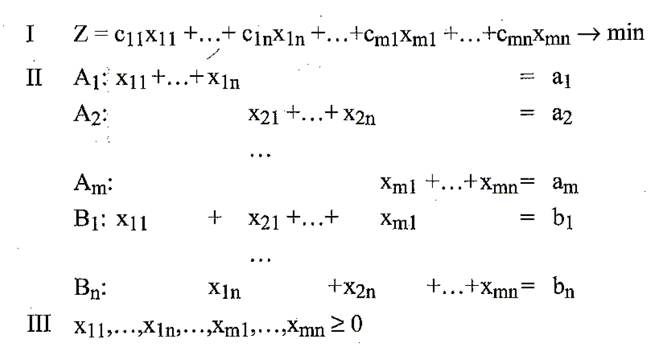

Jetzt das Modell noch lösen, den Status und die Lösung ausgeben 

In [ ]:
                   
# The problem data is written to an .lp file
#transport_model.writeLP("BeerDistributionProblem.lp")
# The optimised objective function value is printed to the screen    
print(transport_model)

# The problem is solved using PuLP's choice of Solver
transport_model.solve()

# The status of the solution is printed to the screen
print ("Status:", LpStatus[transport_model.status])

# Each of the variables is printed with it's resolved optimum value
for v in transport_model.variables():
    print (v.name, "=", v.varValue)
    
print ("Total Cost of Transportation = ", value(transport_model.objective))